In [ ]:
!pip install segmentation-models
!pip install tensorflow==2.1.0
!pip install keras==2.3.1

In [ ]:
!pip install 'h5py==2.10.0' --force-reinstall

     |████████████████████████████████| 2.9MB 32.7MB/s 
     |████████████████████████████████| 15.3MB 197kB/s 
ERROR: tensorflow 2.5.0 has requirement h5py~=3.1.0, but you'll have h5py 2.10.0 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement numpy~=1.19.2, but you'll have numpy 1.20.3 which is incompatible.
ERROR: tensorflow 2.5.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: google-colab 1.0.0 has requirement six~=1.15.0, but you'll have six 1.16.0 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
ERROR: albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.9 which is incompatible.
  Found existing installation: numpy 1.19.5
    Uninstalling numpy-1.19.5:
      Successfully uninstalled numpy-1.19.5
  Found existing installation: six 1.15.0
    Uninstalling six-1.15.0:
      Successfully uninstalled six-1.15.0
  Found e

In [ ]:
!pip install -U -q segmentation-models
!pip install -q tensorflow==2.1
!pip install -q keras==2.3.1
!pip install -q tensorflow-estimator==2.1.

## Imports libs
import os
os.environ['CUDA_VISIBLE_DEVICES'] = '0'
os.environ["SM_FRAMEWORK"] = "tf.keras"

from tensorflow import keras
import segmentation_models as sm

     |████████████████████████████████| 51kB 7.2MB/s 
     |████████████████████████████████| 421.8MB 37kB/s 
     |████████████████████████████████| 3.9MB 34.7MB/s 
     |████████████████████████████████| 450kB 47.3MB/s 
ERROR: tensorflow-probability 0.12.1 has requirement gast>=0.3.2, but you'll have gast 0.2.2 which is incompatible.
     |████████████████████████████████| 378kB 23.8MB/s 
Segmentation Models: using `tf.keras` framework.


In [ ]:
import tensorflow as tf

In [ ]:
import glob

In [2]:
import cv2

In [ ]:
import os

In [ ]:
import numpy as np

In [ ]:
from matplotlib import pyplot as plt

In [ ]:
BACKBONE='resnet34'
preprocess_input=sm.get_preprocessing(BACKBONE)

In [ ]:
SIZE_X=128
SIZE_Y=128

/content/drive/MyDrive/Colab_Notebooks/Sub_Images/1.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/2.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/3.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/4.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/5.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/6.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/7.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/8.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/9.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/10.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/11.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/12.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/13.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/14.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/15.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/16.jpg
/content/drive/MyDrive/Colab_Notebooks/Sub_Images/17.jpg
/content/drive/MyDrive/Colab_Notebooks/S

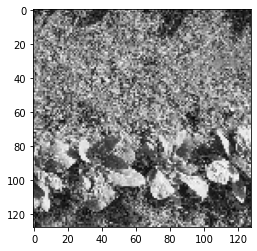

In [ ]:
train_images=[]

directory_path='/content/drive/MyDrive/Colab_Notebooks/Sub_Images/'
for i in range(144):
  img_path=directory_path+str(i+1)+".jpg"
  print(img_path)
  img=cv2.imread(img_path,cv2.IMREAD_GRAYSCALE)
  img=cv2.resize(img,(SIZE_Y,SIZE_X))
  img=cv2.cvtColor(img,cv2.COLOR_RGB2BGR)
  plt.imshow(img, cmap='gray')
  train_images.append(img)

train_images=np.array(train_images)

In [3]:
train_masks=[]

directory_path = '/content/drive/MyDrive/Colab_Notebooks/Sub_Masks/'
for i in range(144):
  mask_path=directory_path+str(i+1)+".png"
  print(mask_path)
  mask=cv2.imread(mask_path,cv2.IMREAD_GRAYSCALE)
  mask=cv2.resize(mask,(SIZE_Y,SIZE_X))
  plt.imshow(mask, cmap='gray')
  train_masks.append(mask)

train_masks=np.array(train_masks)

/content/drive/MyDrive/Colab_Notebooks/Sub_Masks/1.png


NameError: ignored

In [ ]:
X=train_images
Y=train_masks

from sklearn.model_selection import train_test_split
x_train,x_val,y_train,y_val=train_test_split(X,Y,test_size=0.2,random_state=42)

x_train=preprocess_input(x_train)
x_val=preprocess_input(x_val)

In [ ]:
model=sm.Unet(BACKBONE, activation='sigmoid')
model.compile('Adam',loss=sm.losses.binary_crossentropy,metrics=['accuracy'],)

print(model.summary())

Model: "model_10"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
data (InputLayer)               [(None, None, None,  0                                            
__________________________________________________________________________________________________
bn_data (BatchNormalization)    (None, None, None, 3 9           data[0][0]                       
__________________________________________________________________________________________________
zero_padding2d_170 (ZeroPadding (None, None, None, 3 0           bn_data[0][0]                    
__________________________________________________________________________________________________
conv0 (Conv2D)                  (None, None, None, 6 9408        zero_padding2d_170[0][0]         
___________________________________________________________________________________________

In [ ]:
x_train = tf.cast(x_train, dtype='float64')
y_train = tf.cast(y_train/255.0, dtype='float64')
x_val = tf.cast(x_val, dtype='float64')
y_val = tf.cast(y_val/255.0, dtype='float64')

In [ ]:
#y_train = tf.keras.utils.to_categorical(y_train, 3)
#y_val = tf.keras.utils.to_categorical(y_val, 3)

In [ ]:
tf.config.experimental_run_functions_eagerly(True)

In [ ]:
history=model.fit(x_train,y_train,batch_size=8,epochs=40,verbose=1,validation_data=(x_val,y_val),);

Train on 115 samples, validate on 29 samples
Epoch 1/40
115/115 [==============================] - 50s 435ms/sample - loss: 0.5745 - accuracy: 0.7583 - val_loss: 9.0562 - val_accuracy: 0.1755
Epoch 2/40
115/115 [==============================] - 50s 434ms/sample - loss: 0.3217 - accuracy: 0.8940 - val_loss: 5.0820 - val_accuracy: 0.1878
Epoch 3/40
115/115 [==============================] - 50s 433ms/sample - loss: 0.2351 - accuracy: 0.9164 - val_loss: 10.1405 - val_accuracy: 0.2314
Epoch 4/40
115/115 [==============================] - 50s 432ms/sample - loss: 0.1912 - accuracy: 0.9297 - val_loss: 5.5914 - val_accuracy: 0.5386
Epoch 5/40
115/115 [==============================] - 50s 431ms/sample - loss: 0.1736 - accuracy: 0.9312 - val_loss: 10.5474 - val_accuracy: 0.2810
Epoch 6/40
115/115 [==============================] - 49s 430ms/sample - loss: 0.1510 - accuracy: 0.9397 - val_loss: 11.4027 - val_accuracy: 0.2379
Epoch 7/40
115/115 [==============================] - 50s 432ms/sample

<function matplotlib.pyplot.show>

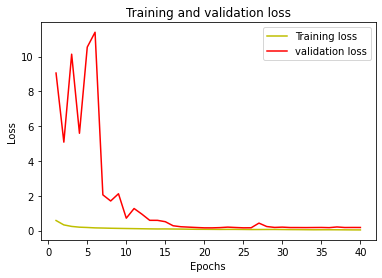

In [ ]:
loss=history.history['loss']
val_loss=history.history['val_loss']
epochs=range(1,len(loss)+1)
plt.plot(epochs, loss, 'y', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='validation loss')
plt.title('Training and validation loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show

In [ ]:
model.save('/content/drive/MyDrive/Colab_Notebooks/membrane5000.h5')

In [ ]:
from tensorflow import keras
model =keras.models.load_model('/content/drive/MyDrive/Colab_Notebooks/membrane4000.h5',compile=False)

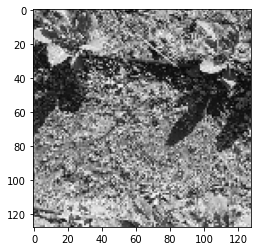

In [ ]:
test_img=cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sub_Images/1.jpg',cv2.IMREAD_GRAYSCALE)
test_img=cv2.resize(test_img,(SIZE_Y,SIZE_X))
test_img=cv2.cvtColor(test_img,cv2.COLOR_RGB2BGR)
plt.imshow(test_img, cmap='gray')
test_img = np.expand_dims(test_img, axis=0)
test_img = tf.cast(test_img, dtype='float64')
test_img=[test_img]
prediction=model.predict(test_img)

In [ ]:
prediction_image[prediction_image < prediction_image.mean]=0
prediction_image[prediction_image >= prediction_image.mean]=1

TypeError: ignored

In [ ]:
for i in range(np.shape(prediction_image)[0]):
  for j in range(np.shape(prediction_image)[1]):
    if prediction_image[i][j][0]>0 or prediction_image[i][j][1]>0 or prediction_image[i][j][2]>0:
      prediction_image[i][j][0]=1
      prediction_image[i][j][1]=1
      prediction_image[i][j][2]=1

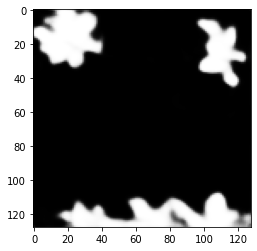

In [ ]:
prediction_image=prediction.reshape(mask.shape)
plt.imshow(prediction_image, cmap='gray')

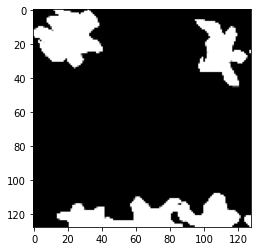

In [ ]:
mask=cv2.imread('/content/drive/MyDrive/Colab_Notebooks/Sub_Masks/1.png',cv2.IMREAD_GRAYSCALE)
mask=cv2.resize(mask,(SIZE_Y,SIZE_X))
plt.imshow(mask, cmap='gray')

In [ ]:
prediction_image

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]], dtype=float32)